In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime, timedelta
import calendar


In [33]:
def minute_diff_to_date(minute_diff):
    '''
    Indicates month, day, hour and time given a minute difference with respect to the 1st April.

    - Input: float with difference in minutes

    - Output: print of the corresponding month, day, hour and minute.
    
    '''
    # Define the specific date (April 1st at 00:00)
    specific_date = datetime(year=2024, month=4, day=1, hour=0, minute=0)

    # Calculate the new date
    new_date = specific_date + timedelta(minutes=minute_diff)

    # Get the name of the month
    month_name = calendar.month_name[new_date.month]

    # Print the new date
    return print(f"The minute difference corresponds to: Month {month_name}, Day {new_date.day}, Hour {new_date.hour}, Minute {new_date.minute}")


def time_to_minute_diff(month, day, hour, minute):
    '''
    Indicates minute difference wrt 1st April given 4 strings with month, day, hour, minute.

    - Input: separate string for month, day, hour and minute.

    - Output: float of minutes of difference wrt 1st April.
    
    '''
    # Convert the inputs to integers
    month = int(month)
    day = int(day)
    hour = int(hour)
    minute = int(minute)

    # Define the specific date (April 1st at 00:00)
    specific_date = datetime(year=2024, month=4, day=1, hour=0, minute=0)

    # Define the new date
    new_date = datetime(year=2024, month=month, day=day, hour=hour, minute=minute)

    # Calculate the minute difference
    minute_diff = (new_date - specific_date).total_seconds() / 60

    return print(f"The minute difference is {minute_diff}")


def minutes_to_time(minutes):
    '''
    Indicates hours and minutes in a day given total minutes.

    - Input: float of minutes.

    - Output: print with corresponding hour and minutes.
    '''
    # Calculate the hour and minute
    hour = minutes // 60
    minute = minutes % 60

    # Print the hour and minute
    return print(f"The minutes correspond to: Hour {hour}, Minute {minute}")

def time_to_minutes(hour, minute):
    '''
    Indicates minutes in a day given hours and minutes.

    - Input: strings of hour and minute.

    - Output: print with corresponding minutes.
    '''
    # Convert the inputs to integers
    hour = int(hour)
    minute = int(minute)

    # Calculate the number of minutes passed in the day
    minutes = hour * 60 + minute

    return print(f"The number of minutes passed in the day is {minutes}")


def prob_between_times(time_float_start, time_float_end, mu, std):
    '''
    Calculate probability given two floats and the mean and standard deviation of a Gaussian fit.

    - Input:
       - time_float_start: starting float in time
       - time_float_end: end minute
       - mu: mean of the normal fit
       - std: standard deviation of the normal fit

    - Output: 
       - Probability of a event happening between those minutes

    '''

    # Calculate the CDF at minute1 and minute2
    cdf_start = norm.cdf(time_float_start, mu, std)
    cdf_end = norm.cdf(time_float_end, mu, std)

    return cdf_end - cdf_start

## Import data


In [34]:
specific_date = datetime(year=2024, month=4, day=1, hour=0, minute=0)

# Define columns to keep
keep_cols = [0,1,2,7,4]

# Define rows to skip
skip_rows = 0

# Import data 
ice_data = pd.read_excel('./data.xlsx', sheet_name = 'Worksheet', skiprows=skip_rows, usecols=keep_cols)

# Create a column with only hours in 24h format 
ice_data['Hour'] = np.floor(ice_data['Hour (24)'])

# Creates new column in datetime format
ice_data['datetime'] = pd.to_datetime(ice_data[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# ice_data.to_csv(r'C:\Users\daniw\TUDelft\PROB&STAT\MUDE\Data.csv')
# ice_data = pd.read_csv(r'C:\Users\daniw\TUDelft\PROB&STAT\MUDE\Data.csv')

# Calculate the difference in minutes
ice_data['minutes_diff'] = np.abs((ice_data['datetime'] - specific_date).dt.total_seconds() / 60)

#calculate minute of the day
ice_data['minutes_in_day'] = ice_data['datetime'].dt.hour * 60 + ice_data['datetime'].dt.minute

# Make sure all data is in the right format
ice_data['datetime'] = pd.to_datetime(ice_data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
ice_data['Year'] = ice_data['datetime'].dt.year
ice_data['Month'] = ice_data['datetime'].dt.month
ice_data['Day'] = ice_data['datetime'].dt.day
ice_data['Hour'] = ice_data['datetime'].dt.hour
ice_data['Minute'] = ice_data['datetime'].dt.minute

# Create a new column for the specific date (April 1st at 00:00) of the same year
ice_data['reference_date'] = pd.to_datetime(ice_data['Year'].astype(str) + '-04-01')

# Calculate the difference in minutes
ice_data['minutes_diff'] = (ice_data['datetime'] - ice_data['reference_date']).dt.total_seconds() / 60

#calculate minute of the day
ice_data['minutes_in_day'] = ice_data['datetime'].dt.hour * 60 + ice_data['datetime'].dt.minute

In [36]:
ice_data

,Year,Month,Day,Minute,Hour (24),Hour,datetime,minutes_diff,minutes_in_day,reference_date
0,1917,4,30,30,11.500000,11,1917-04-30 11:30:00,42450.0,690,1917-04-01
1,1918,5,11,33,9.550000,9,1918-05-11 09:33:00,58173.0,573,1918-04-01
2,1919,5,3,33,14.550000,14,1919-05-03 14:33:00,46953.0,873,1919-04-01
3,1920,5,11,46,10.766667,10,1920-05-11 10:46:00,58246.0,646,1920-04-01
4,1921,5,11,42,6.700000,6,1921-05-11 06:42:00,58002.0,402,1921-04-01
...,...,...,...,...,...,...,...,...,...,...
102,2019,4,14,21,12.350000,12,2019-04-14 12:21:00,19461.0,741,2019-04-01
103,2020,4,28,56,24.933333,0,2020-04-28 00:56:00,38936.0,56,2020-04-01
104,2021,5,1,50,24.833333,0,2021-05-01 00:50:00,43250.0,50,2021-04-01
105,2022,5,2,27,18.450000,18,2022-05-02 18:27:00,45747.0,1107,2022-04-01


In this block data is imported cleaned and prepared for calculations. In particular the columns minutes_diff and minutes_in_day are the ones of insterest. minutes_diff contains floats with the ammount of minutes between the date of each year and the 1st of April of that same year. minutes_in_day on the other hand provides the minutes in the day with respect to 00:00 of the date given.


## Minutes Difference

Down below you can have a first look at the difference in minutes data with respect to the 1st of April. There is first an histogram and then a Gaussian fit of the data is performed. To make the interpretation easier a couple functions have been implemented. time_to_minute_diff allows you to transfor any date into actual minute differences whereas minute_diff_to_date does the opposite.

In [37]:
time_to_minute_diff('4', '15', '10', '30')

The minute difference is 20790.0


In [38]:
minute_diff_to_date(2000)

The minute difference corresponds to: Month April, Day 2, Hour 9, Minute 20


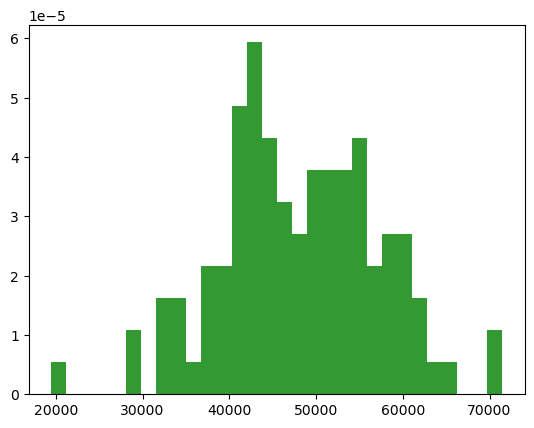

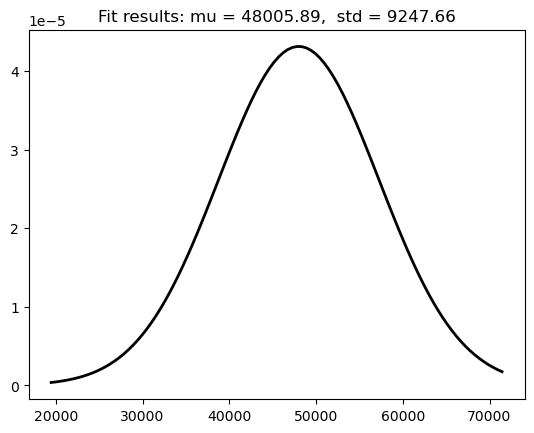

In [39]:
# Assuming df is your DataFrame and it has a column 'minutes_diff'
data = ice_data['minutes_diff']

# Calculate the Gaussian fitted PDF
mu_date, std_date = norm.fit(data)
xmin, xmax = np.min(data), np.max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_date, std_date)


# Plot the empirical PDF
plt.figure(1)
plt.hist(data, bins=30, density=True, alpha=0.8, color='g')

# Plot the Gaussian fitted PDF
plt.figure(2)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_date, std_date)
plt.title(title)

plt.show()

Once the fit is done, the next step would be to calculate some probabilities. For that the function prob_between_minutes is given, taking two minutes and the mean an variance fit from the gaussian distribution. This allows you to make you best guess for a date but the range of minutes can be increased as desired

In [40]:
prob_between_times(26670, 26671, mu_date, std_date)

3.0133767392279825e-06

## Minutes in Day

Similar to what you saw in the previous section, the same procedure can be applied to the minutes in the day. The function minutes_to_time again provides you with a transformation from minutes to hours and minutes, and the function time_to_minutes does exactly the opposite.

In [41]:
minutes_to_time(875)

The minutes correspond to: Hour 14, Minute 35


In [42]:
time_to_minutes('14', '35')

The number of minutes passed in the day is 875


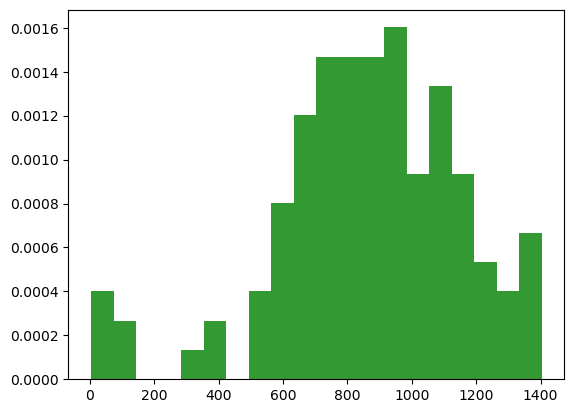

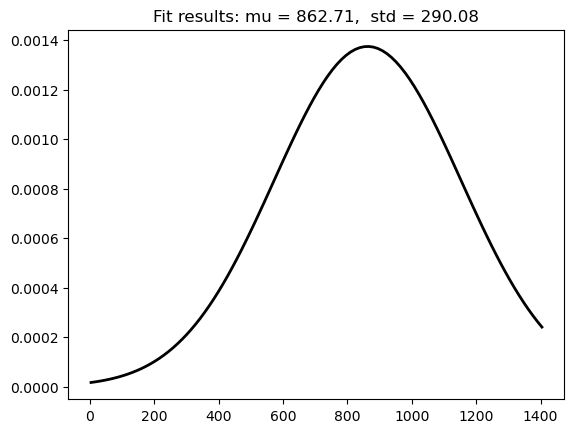

In [43]:
# Assuming df is your DataFrame and it has a column 'minutes_diff'
data = ice_data['minutes_in_day']

# Calculate the Gaussian fitted PDF
mu_day, std_day = norm.fit(data)
xmin, xmax = np.min(data), np.max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_day, std_day)


# Plot the empirical PDF
plt.figure(1)
plt.hist(data, bins=20, density=True, alpha=0.8, color='g')

# Plot the Gaussian fitted PDF
plt.figure(2)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_day, std_day)
plt.title(title)

plt.show()

For this case the same function prob_between_minutes can be used. Try making you own guesses!

In [44]:
prob_between_times(875, 876, mu_day, std_day)

0.0013739530758714036

### Extra

In [45]:
# Calculate the difference in minutes
day_diff = (ice_data['datetime'] - ice_data['reference_date']).dt.total_seconds() / (60*60*24)

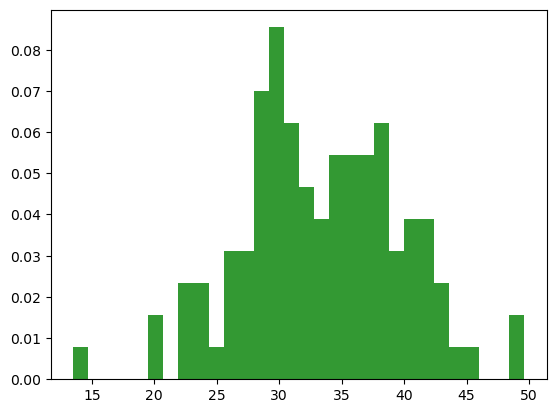

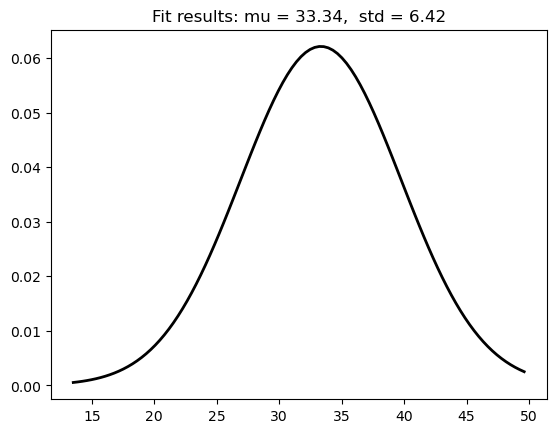

In [46]:
# Assuming df is your DataFrame and it has a column 'minutes_diff'
data = day_diff

# Calculate the Gaussian fitted PDF
mu_2, std_2 = norm.fit(data)
xmin, xmax = np.min(data), np.max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_2, std_2)


# Plot the empirical PDF
plt.figure(1)
plt.hist(data, bins=30, density=True, alpha=0.8, color='g')

# Plot the Gaussian fitted PDF
plt.figure(2)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_2, std_2)
plt.title(title)

plt.show()

In [32]:
prob_between_times(31, 32, mu_2, std_2)

0.05881433084689536

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    By <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE Team</a>
    &copy; 2024 TU Delft. 
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0</a>.
    <a rel="Zenodo DOI" href="https://doi.org/10.5281/zenodo.16782515"><img style="width:auto; height:15; vertical-align:middle" src="https://zenodo.org/badge/DOI/10.5281/zenodo.16782515.svg" alt="DOI https://doi.org/10.5281/zenodo.16782515"></a>
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->